In [1]:
from models.Triphasic import Triphasic
import numpy as np
import matplotlib.pyplot as plt
from transformations.Clarke import clark
from transformations.Park import park

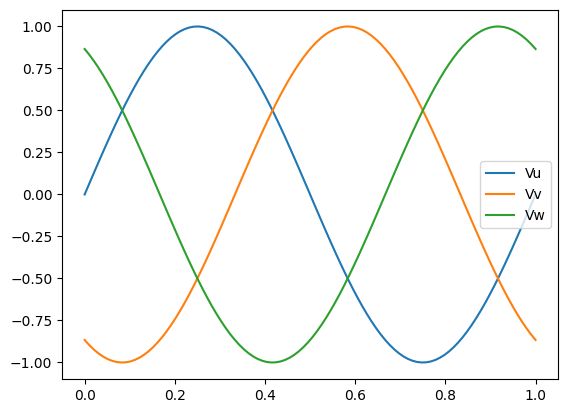

In [2]:
pi = np.pi
simulation_time = 1
time_step = 1e-2
ticks = int(simulation_time/time_step)

simulation_time = time_step * ticks
t = np.linspace(0,simulation_time,ticks)


triphasic = Triphasic(time = t)
theta = triphasic.Vu.angular_frequency*t

Vu, Vv, Vw = triphasic.out

plt.plot(t,Vu,t,Vv,t,Vw)
plt.legend(["Vu","Vv","Vw"])

In [3]:
alpha, beta, gamma = clark(triphasic.out)
vd, vq, vo = park(theta,np.array([alpha,beta,gamma]))

Text(0, 0.5, 'V')

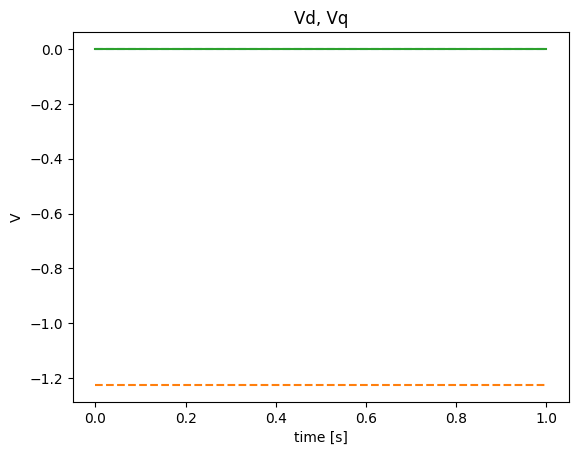

In [4]:
plt.plot(t,vd,"--",t,vq, "--",t,vo)
plt.title("Vd, Vq")
plt.xlabel("time [s]")
plt.ylabel("V")

In [5]:
def d_polar(theta,vd):
    return np.cos(theta)*vd, np.sin(theta)*vd
def q_polar(theta,vq):
    return -np.sin(theta)*vq, np.cos(theta)*vq

In [6]:
raw_mag = np.multiply(clark(triphasic.out),clark(triphasic.out))
raw_mag = np.sum(raw_mag,0)
raw_mag = np.sqrt(raw_mag)

alpha_polar = np.multiply(np.cos(theta),raw_mag)
beta_polar = np.multiply(np.sin(theta),raw_mag)


dxy_polar = [d_polar(theta_val,vd_val) for theta_val, vd_val in zip(theta,vd)]
qxy_polar = [q_polar(theta_val,vq_val) for theta_val, vq_val in zip(theta,vq)]

d_axis = [d_polar(theta_val,0.5) for theta_val in theta]
q_axis = [q_polar(theta_val,0.5) for theta_val in theta]

In [7]:
def plot_sectors(ax:plt.Axes, radius):
    sectors = np.radians(range(0,360,60))
    for sector in sectors:
        x = [0]
        y = [0]
        x.append(np.cos(sector)*radius)
        y.append(np.sin(sector)*radius)
        ax.plot(x,y,'--')

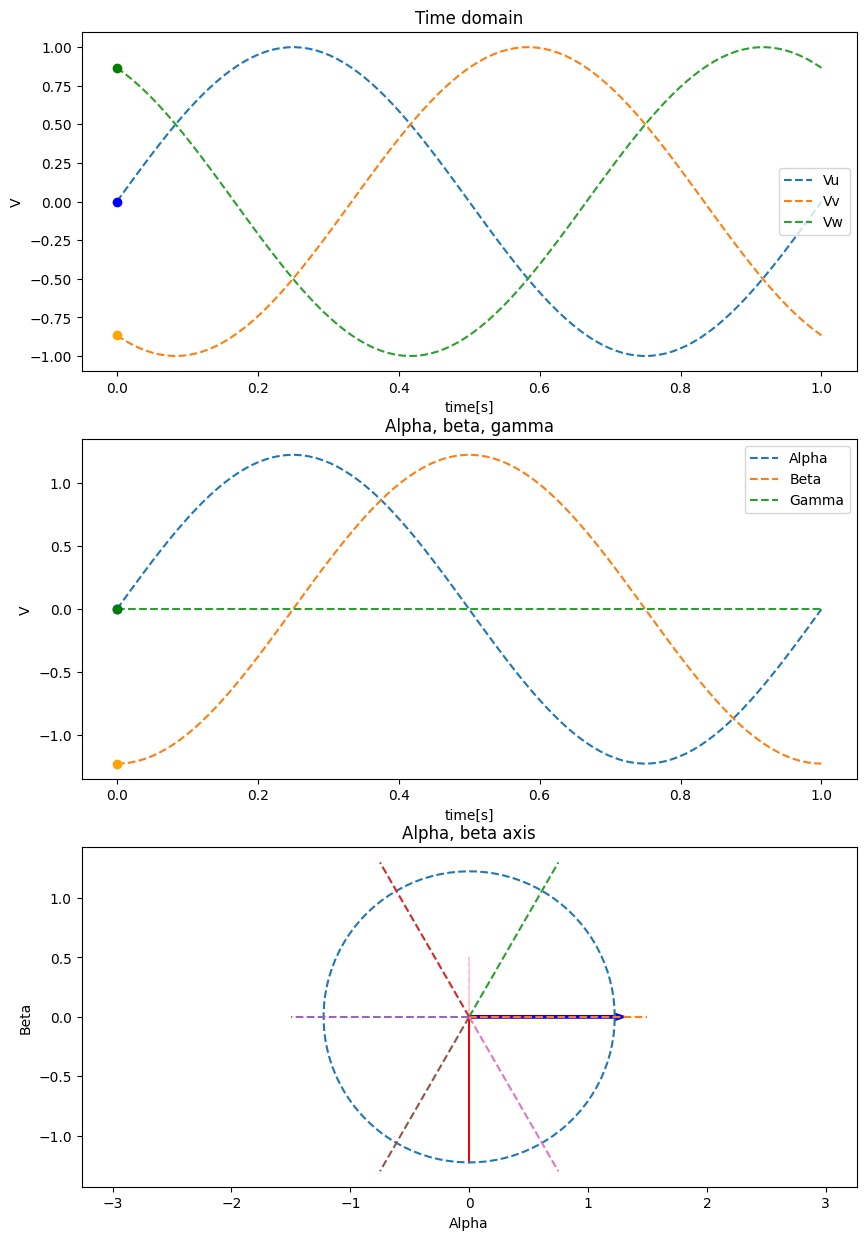

In [8]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
fig,axs = plt.subplots(3, figsize=(10,15))

axs[0].plot(t,Vu,"--",t,Vv,"--",t,Vw,"--")
u, = axs[0].plot(t[0],Vu[0],"bo")
v, =axs[0].plot(t[0],Vv[0],"o",color="orange")
w, = axs[0].plot(t[0],Vw[0],"go")


axs[0].set_xlabel("time[s]")
axs[0].set_ylabel("V")
axs[0].legend(["Vu","Vv","Vw"])
axs[0].set_title("Time domain")

axs[1].plot(t, alpha,"--",t, beta,"--",t, gamma,"--")
al, = axs[1].plot(t[0],alpha[0],"bo")
bet, =axs[1].plot(t[0],beta[0],"o",color="orange")
gam, = axs[1].plot(t[0],gamma[0],"go")


axs[1].set_xlabel("time[s]")
axs[1].set_ylabel("V")
axs[1].legend(["Alpha","Beta","Gamma"])
axs[1].set_title("Alpha, beta, gamma")

axs[2].plot(alpha_polar,beta_polar,"--")
polar = axs[2].arrow(0,0,alpha_polar[0],beta_polar[0], width= 0.02, color="blue")

plot_sectors(axs[2], 1.5)

dx,dy = dxy_polar[0]
qx,qy = qxy_polar[0]

d_axis_plot = axs[2].arrow(0,0,d_axis[0][0],d_axis[0][1], color="purple", ls="--")
q_axis_plot = axs[2].arrow(0,0,q_axis[0][0],q_axis[0][1], color="pink", ls="--")

vd_polar = axs[2].arrow(0,0,dx,dy)
vq_polar = axs[2].arrow(0,0,qx,qy)
dq = axs[2].arrow(0,0,dx+qx,dy+qy, color="red")


axs[2].axis("equal")
axs[2].set_title("Alpha, beta axis")
axs[2].set_xlabel("Alpha")
axs[2].set_ylabel("Beta")

def animate(i):
    dx,dy = dxy_polar[i]
    qx,qy = qxy_polar[i]
    return[
        v.set_data(t[i],Vv[i]),u.set_data(t[i],Vu[i]),w.set_data(t[i],Vw[i]),
        al.set_data(t[i],alpha[i]),
        bet.set_data(t[i],beta[i]),
        gam.set_data(t[i],gamma[i]),
        polar.set_data(x=0,y=0,dx=alpha_polar[i],dy=beta_polar[i]),
        d_axis_plot.set_data(x=0,y=0,dx=d_axis[i][0],dy=d_axis[i][1]),
        q_axis_plot.set_data(x=0,y=0,dx=q_axis[i][0],dy=q_axis[i][1]),
        vd_polar.set_data(x=0,y=0,dx=dx,dy=dy),
        vq_polar.set_data(x=0,y=0,dx=qx,dy=qy),
        dq.set_data(x=0,y=0,dx=qx+dx,dy=qy+dy)]

ani = FuncAnimation(fig, animate, frames=len(t), interval=200, repeat=False)

In [9]:
ani.save("media/dq.gif")

![](media\dq.gif)